<a href="https://colab.research.google.com/github/abhi221a/FreeCodeCamp_TensorFlow/blob/main/Core_Learning_AlgorithmsA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##TensorFlow Core Learning Algorithms

In this notebook we will walk through 4 fundamental machine learning algorithms. We will apply each of these algorithms to unique problems and datasets before highlighting the use cases of each.

The algorithms we will focus on include:

*   Linear Regression
*   Classification
*   Clustering
*   Hidden Markov Models

It is worth noting that there are many tools within TensorFlow that could be used to solve the problems we will see bellow. I have chosen the tools that I belive give the most variety and are easiest to use.



## Linear Regression

Linear regression is one of the most basic form of machine learning and is used to predict numeric values. In this tutorial we will use a linear model to predict the survival rate of passengers from the titatic dataset. _This section is based on the following documentation : https://www.tensorflow.org/tutorials/estimator/linear_

##How it works

Before we dive in I will provide a very surface level explanation of the linear regression algorithm.

Linear regression follows a very simple concept. If data points are related linearly we can generate a line of best fit for these points and use it to predict future values.

Lets take an example of a data set with one feature and one label.

In [ ]:
!pip install tensorflow_decision_forests


<function matplotlib.pyplot.show>

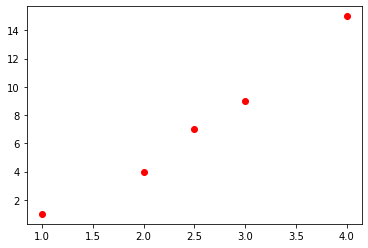

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = [1, 2, 2.5, 3, 4]
y = [1, 4, 7, 9, 15]
plt.plot(x, y, 'ro')
#plt.axes([0, 6, 0, 20])
plt.show

We can see that this data has a linear corespondence. When the x value increases, so does the y. Because of this relation, we can create a line of best fit for this dataset. In this example our line will only use one input variable, as we are working with two dimensions. In larger datasets with more features our line will only use one input variable, as we are working with two dimensions. In larger datasets with more features our line will have more features and inputs.

" Line of best fit refers to a line through a scatter plot of data points that best expresses the relationship etween those points."

Here is a refresher on the equation of a line in 2D.

_y=mx+c_

Here is an example of line of best fit for this graph.

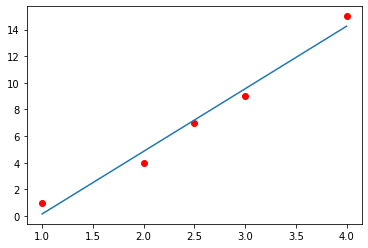

In [ ]:
plt.plot(x, y, 'ro')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x,y,1))(np.unique(x)))
plt.show()

Once we've generated this line for our dataset we can use it's equation to predict future values. 

## Setup and Imports

Before we get started we must install sklearn and import the following modules

In [ ]:
!pip install -q sklearn

In [ ]:
%tensorflow_version 2.x #this line is not required unless you are in a notebook

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x #this line is not required unless you are in a notebook`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output  #diplay output in notebook
from six.moves import urllib

import tensorflow.compat.v2.feature_column as feature_column
import keras
import tensorflow as tf
import tensorflow_decision_forests as tfdf


## Data

So if you haven't realized by now, a major part of machine learning is data! In fact it's so important that most of what we do in this tutorial will focus on exploring, cleaning and selecting appropriate data.

The dataset we will be focusing on here is the titanic dataset. It has tons of information about each passenger on th ship. Our first step is always to understand the data and explore it. So let's do that!

**Below we will load a dataset and learn how we can explore it using sone built-in tolls.**

In [ ]:
#Load dataset.
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') #training data
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') #testing data
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')

The **pd_readcsv()** method will return to us a new pandas _dataframe_. You can think of a dataframe like a table. In fact we can actually have a look at the table representation.

We've decided to pop the "survied" column from our dataset and store it in a new variable. This column simply tells us if the person survived or not.

To look at the data we"ll use .head() method from pandas. This will show us the first 5 items in our dataframe.

In [ ]:
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


And if we want a more statistical analysis of our data we can use the .describe() method.

In [ ]:
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


And since we talked so much about shapes in the previous tutorial lets have a look at that too!

In [ ]:
dftrain.shape

(627, 9)

Now lets have a look at our survival information.

In [ ]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

Notice that each entry is either a 0 or 1. Can you guess which stands for suvival?

**And now because visuals are always valuable let's generate a few graqphs of the data**

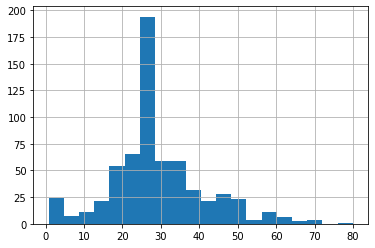

In [ ]:
dftrain.age.hist(bins=20)

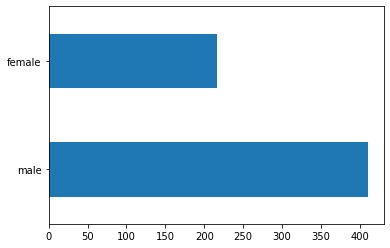

In [ ]:
dftrain.sex.value_counts().plot(kind='barh')

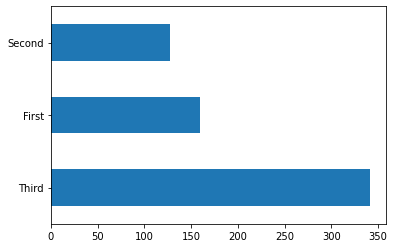

In [ ]:
dftrain['class'].value_counts().plot(kind='barh')

Text(0.5, 0, '% survive')

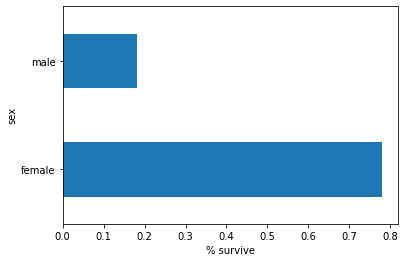

In [ ]:
pd.concat([dftrain, y_train], axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% survive')

After analyzing this information we should notice the following:
  * The majority of the passengers are in their 20's and 30's
  *The majority of the passengers are male
  * The majority of passengers are in "Third" class
  * Females have much higher chance of survival

## Training vs Testing Data

Your have noticed that we loaded **two different datasets** above. This is because when we train models we need two sets of data: **training and testing**.

The **training** data is what we feed to the model so that it can develop and leran. It is usually a much larger size than the testing data.

The **testing** data is what we use to evaluate the model and see how well it is performing. We must use a seperate set of data that the model has not been trained on to evaluate it. Can you think of why this is?

 Well, THe point of our model is to be able to make predictions on NEW data, data that we have never seen before. If we simply test the model on the data that it has already seen we cannot measure its accuracy accuratly. We can't be sure that the model hasn't simply memorized our training data. This is why we need our testing and training data to be seperate.

## Feature Columns

 In our dataset we have two diferent kinds of information: **Categorical and Numerical**

 Our **Catagorical data** is anything that is not numeric! For example, the sex column doesnot use numbers, it uses the words "male" and "female".

 Before we continue and create/train a model we must convert our categorical data into numeric data. We can do this by encoding each category with an integer (ex male = 1, female = 2).

 Fortunately for us TensorFlow has some tools to help!

In [ ]:
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck', 'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']


feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = dftrain[feature_name].unique() # gets a list of all unique values from given feature column
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feature_columns)

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

Some relevent documentation:

https://www.tensorfolw.org/api_docs/python/tf/feature_column/categorical_columnm_with_vocabulary_list?version=stable

## The Training Process

So we are almost done preparing our dataset and I fell as though it's a good time to explain how our model is trained. Specifically how inpt data is fed to our model.

For this specific model data is going to be streaed into it in small batches of 32. This means we will not feed the entire dataset to our model at once, but simply small batches of entries. We will actually feed these batches to our model multiple times according to the number of **epoachs**.

An **epoch** is simply one stram of our entire dataset. The number of epochs we define is the amount of times our model will see the entiire dataset. We use multiple epochs in hope that seeing the same data multiple times the model will better determine how to estimate it.

Ex. if we have 10 ephocs, our model will see the same dataset 10 times.

Since we need to feed our data in batches and multiple times we need to create something called an **input function**. The input function simply defines how our dataset wil be converted into batches at each epoch.

## Input Function

The TensorFlow model we are going to use requires that the data we pass it comes in as a **tf.data.Dataset** object. This means we must create a input function that can converte our current pandas dataframe into that object.

Beloow you'll see a seemingly complicated input function, this is strainht from the TensorFlow documentation. (https://www.tensorflow.org/tutorials/estimator/linear). I've commented as much as I can make it understandable, but you may want to refer to the documentation for a detaled ec[planation of each method.1`

In [ ]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function(): #inner funciton, this will be returned
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))  #create tf.data.Dataset object with data and its label
    if shuffle:
      ds = ds.batch(batch_size).repeat(num_epochs)  # split dataset into batches of 32 and repeat process for number of epochs
    ds = ds.batch(batch_size).repeat(num_epochs)  #split dataset into batches of 32 and repeat process for number of epachs
    return ds   # return a batch of dataset
  return input_function

train_input_fn = make_input_fn(dftrain, y_train)    
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)

## Creating the Model

In this tutorial we are going to use a linear estimator to utilize the linear regression algoritm.

Creating on is actually pretty easy! Have a look.

In [ ]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)
linear_est.train(train_input_fn)

# We created a linear estimator by passing the feature columns we created earlier.

## Training the Model

Training the model is as easy as passing the input functins that we created earlier.


'''
linear_est.train(train_input_fn) #train

'''

This part is not working properly.Because Estimator is outdated..

Instead we are using .predict()

In [ ]:
linear_est.train(train_input_fn)

result = linear_est.evaluate(eval_input_fn) #get model metrics/stats by testing on testing data

clear_output() #clears consoke output

print(result['accuracy'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmprn3hch1b/model.ckpt-0
Instructions for updating:
Use standard file utilities to get mtimes.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmprn3hch1b/model.ckpt.
INFO:tensorflow:/tmp/tmprn3hch1b/model.ckpt-0.data-00000-of-00001
INFO:tensorflow:0
INFO:tensorflow:/tmp/tmprn3hch1b/model.ckpt-0.meta
INFO:tensorflow:500
INFO:tensorflow:/tmp/tmprn3hch1b/model.ckpt-0.index
INFO:tensorflow:500
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...


InvalidArgumentError: ignored

In [ ]:
result = list(linear_est.predict(eval_input_fn))
print(result)

INFO:tensorflow:Could not find trained model in model_dir: /tmp/tmp73s9xfjv, running initialization to predict.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
[{'logits': array([0.], dtype=float32), 'logistic': array([0.5], dtype=float32), 'probabilities': array([0.49999997, 0.49999997], dtype=float32), 'class_ids': array([0]), 'classes': array([b'0'], dtype=object), 'all_class_ids': array([0, 1], dtype=int32), 'all_classes': array([b'0', b'1'], dtype=object)}, {'logits': array([0.], dtype=float32), 'logistic': array([0.5], dtype=float32), 'probabilities': array([0.49999997, 0.49999997], dtype=float32), 'class_ids': array([0]), 'classes': array([b'0'], dtype=object), 'all_class_ids': array([0, 1], dtype=int32), 'all_classes': array([b'0', b'1'], dtype=object)}, {'logits': array([0.], dtype=float32), 'logistic': array([0.5], dtype=float32), 'p

In [ ]:
print(result[0]['probabilities'][1])

0.49999997


In [ ]:
print(dfeval.loc[2])
print(result[2]['probabilities'][1])

sex                        female
age                          58.0
n_siblings_spouses              0
parch                           0
fare                        26.55
class                       First
deck                            C
embark_town           Southampton
alone                           y
Name: 2, dtype: object
0.49999997
